In [25]:
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft

# ML
## preprocssing
from sklearn.model_selection import train_test_split

## Models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Cross Validation
import time
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

## evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


## Load Data

In [26]:
data_train = loadarff('1_DatasetCharacteristics/data/InsectSound_TRAIN.arff')
data_test = loadarff('1_DatasetCharacteristics/data/InsectSound_TEST.arff')

df_train = pd.DataFrame(data_train[0])
df_test = pd.DataFrame(data_test[0])

In [27]:
# look at 10 random instances of the data set
samples = df_train.sample(10).sort_index()
samples

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att592,att593,att594,att595,att596,att597,att598,att599,att600,target
2497,-0.008822,1.643230e-03,-8.088757e-04,4.877966e-04,-3.004278e-04,0.000192,-0.000123,0.000066,-0.000038,1.881135e-05,...,0.000004,0.000013,-0.000014,0.000031,-0.000031,0.000072,-0.000118,0.000172,-0.000351,b'Aedes_female'
4233,-0.039776,-1.477145e-01,-2.629030e-01,-8.773098e-02,2.441182e-01,0.225676,0.150692,0.026131,0.009357,8.332506e-02,...,0.000050,0.000079,-0.000016,-0.000083,-0.000006,0.000067,0.000045,-0.000024,-0.000081,b'Aedes_male'
4903,0.012492,1.636304e-02,9.932414e-03,6.845647e-03,2.572288e-03,0.001176,0.001004,0.003356,0.007259,1.209460e-02,...,0.001793,0.001600,0.001080,0.000980,0.000882,0.000481,0.000615,0.000775,0.001381,b'Aedes_male'
6875,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,b'Fruit_flies'
7342,-0.000780,-5.990601e-04,3.256247e-04,7.633346e-04,7.654576e-05,-0.000684,-0.000419,0.000447,0.000631,-8.575155e-05,...,0.193958,0.187467,0.178941,0.107482,0.094609,0.103401,0.097922,0.066433,0.095668,b'Fruit_flies'
13580,-0.002995,-4.839627e-03,-4.381926e-03,-4.897615e-03,-5.089017e-03,-0.005084,-0.004410,-0.003365,-0.001960,-7.913863e-04,...,0.010051,0.010957,0.012041,0.013162,0.015277,0.016442,0.018449,0.018005,0.020766,b'Quinx_male'
13920,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,b'Quinx_male'
14111,0.000007,1.126043e-07,1.150643e-05,-8.418406e-07,-9.787551e-07,-0.000011,-0.000011,-0.000005,0.000002,-9.491404e-07,...,-0.019422,-0.017628,-0.017471,-0.017662,-0.016723,-0.014706,-0.010796,-0.006047,-0.000824,b'Quinx_male'
19012,-0.000009,-1.733270e-06,-9.031843e-07,-4.247101e-06,-1.182430e-05,0.000009,0.000002,0.000004,0.000010,-4.957182e-06,...,0.089146,0.030673,-0.050597,-0.066995,-0.060287,-0.051404,-0.017016,0.002435,-0.003505,b'Stigma_male'
20531,-0.000484,-2.478707e-03,-3.152062e-03,-2.279244e-03,-2.080902e-03,0.000515,0.003607,-0.001654,-0.009385,-7.710952e-03,...,-0.020976,-0.023096,-0.027771,-0.026057,-0.026404,-0.027454,-0.027688,-0.028035,-0.030545,b'Tarsalis_female'


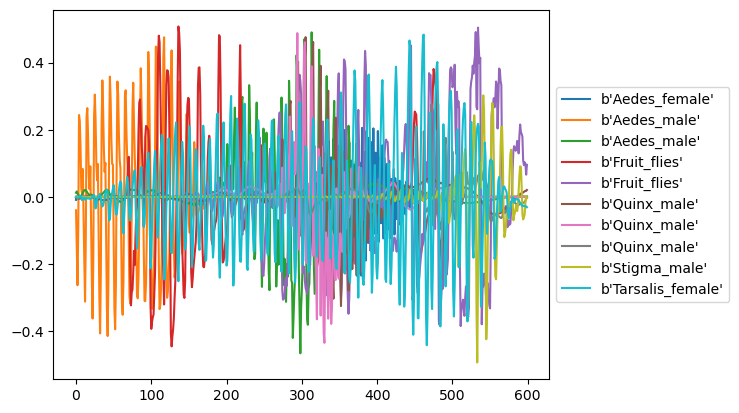

In [28]:
for i in range(len(samples)):
    plt.plot(range(len(df_train.columns)-1), samples.iloc[i, :-1], label = samples.iloc[i, -1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# FFT

- test scipy.signal.find_peaks 

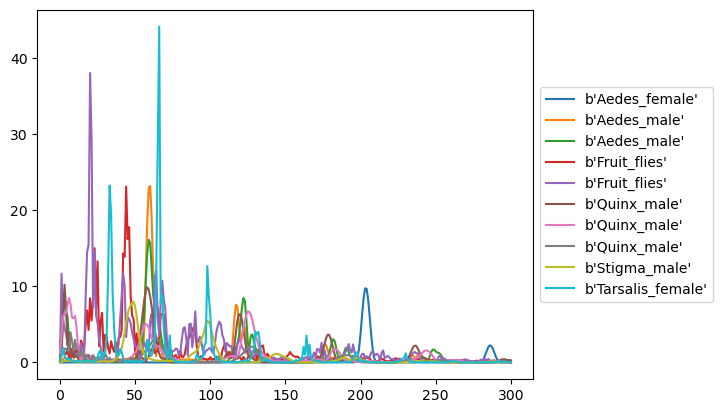

In [29]:
for i in range(len(samples)):
    plt.plot(range(301), abs(rfft(samples.iloc[i, :-1])), label = samples.iloc[i, -1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

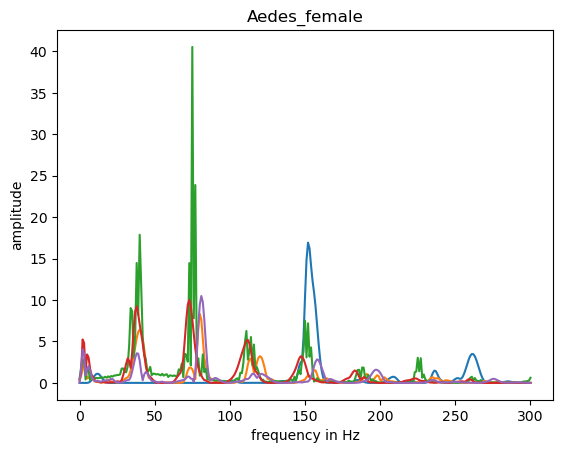

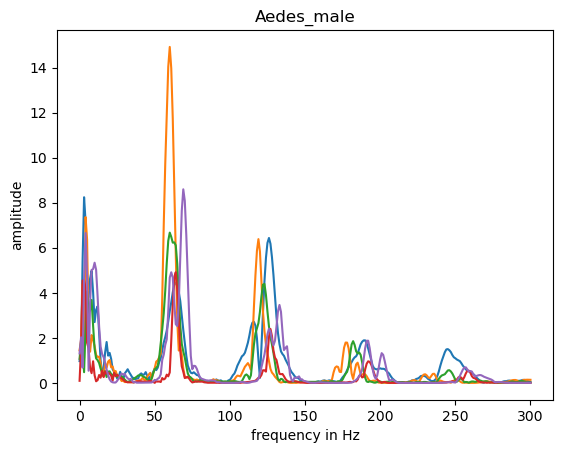

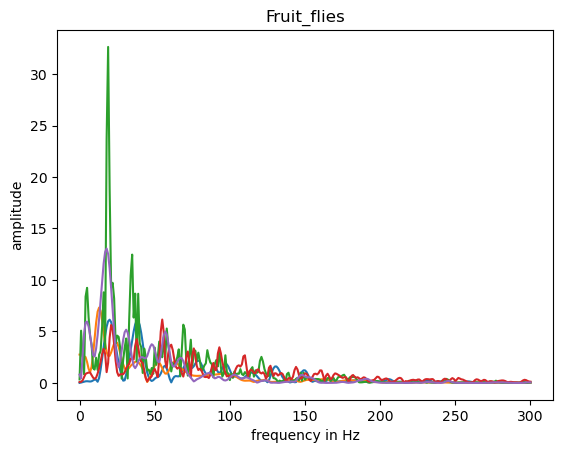

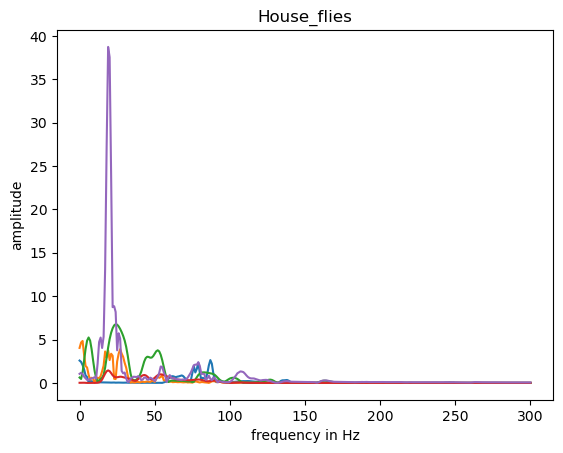

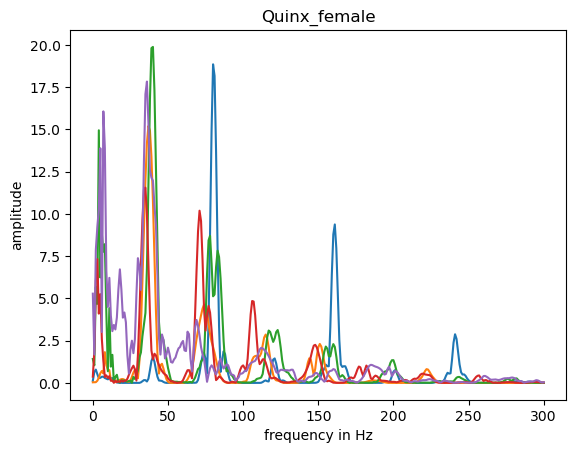

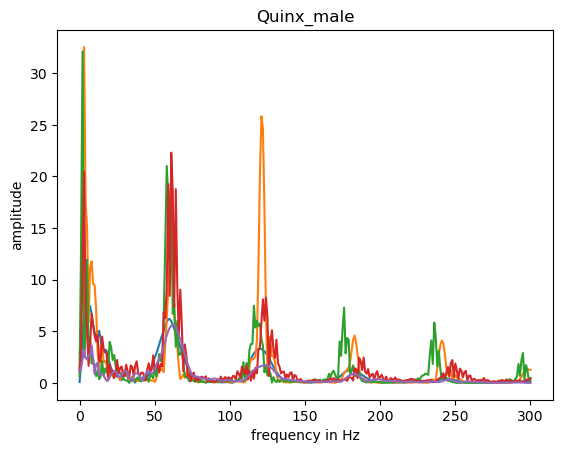

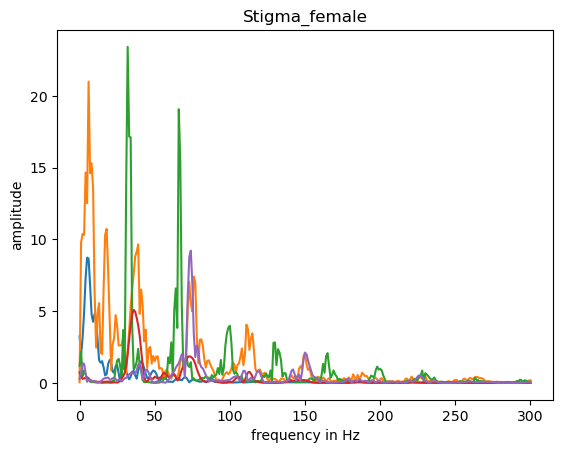

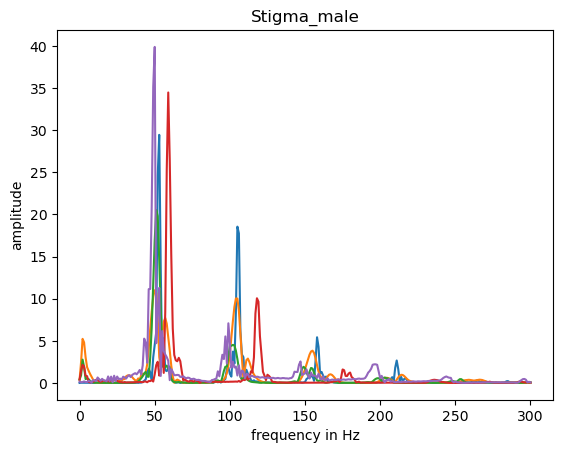

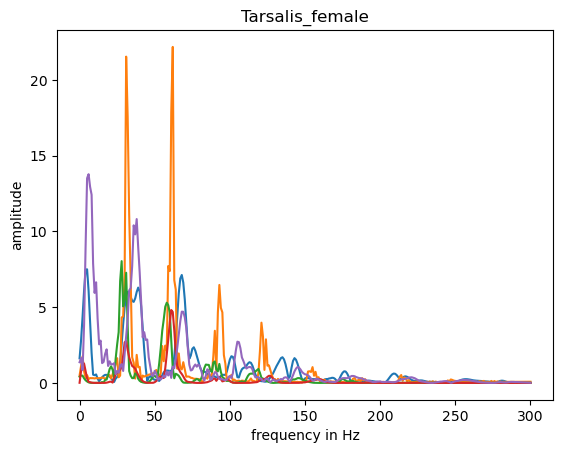

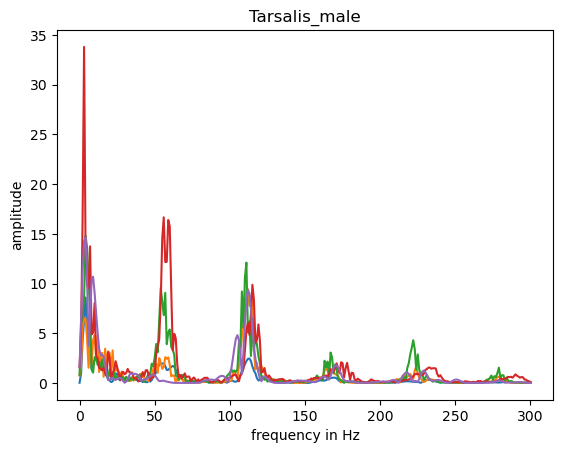

In [30]:
# plot 5 instances of each species 
for i in df_train.target.unique():
    df_temp = df_train[df_train.target == i].head(5)
    for j in range(len(df_temp)) :
        plt.plot(range(301), abs(rfft(df_temp.iloc[j, :-1])))
    plt.title(i.decode('UTF-8'))
    plt.xlabel("frequency in Hz")
    plt.ylabel("amplitude")
    plt.show()

    

In [31]:
X_train = pd.DataFrame(abs(rfft(df_train.drop(columns = "target"))))

X_test = pd.DataFrame(abs(rfft(df_test.drop(columns = "target"))))

In [32]:
# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
y_train = le.fit_transform(df_train['target'])
y_test = le.fit_transform(df_test['target'])

# printing label
y_train, y_test

(array([0, 0, 0, ..., 9, 9, 9]), array([0, 0, 0, ..., 9, 9, 9]))

In [33]:
X_train_smaller = X_train.iloc[:, :150]
X_test_smaller = X_test.iloc[:, :150]
X_train_smaller

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.005107,0.003539,0.004149,0.011252,0.003870,0.003155,0.042232,0.154303,0.345499,0.599401,...,0.049566,0.024122,0.016084,0.074402,0.389015,1.073090,1.957930,2.438095,2.677814,5.482581
1,0.276832,0.890035,1.616741,2.549686,1.589538,0.527910,0.680788,0.465630,0.519724,0.369701,...,0.001725,0.001915,0.008473,0.018719,0.041839,0.077864,0.128631,0.188483,0.272613,0.330250
2,0.534062,1.852436,2.883891,2.586658,0.420808,1.707434,1.508141,0.309464,0.939695,0.622383,...,0.403642,0.407308,0.187550,0.756345,0.321741,1.059958,1.602663,1.053157,2.728888,3.820208
3,0.401689,1.139451,5.240613,4.823131,1.369612,3.438861,3.060122,1.713568,0.930940,0.727151,...,0.516989,0.765388,1.059763,1.401480,1.840619,2.375312,2.890249,3.203385,3.175464,2.869773
4,0.053369,1.676477,4.024979,3.542231,0.911268,1.725657,2.026754,1.463920,0.787932,0.433794,...,0.025583,0.041644,0.062026,0.077586,0.085260,0.086752,0.085499,0.075164,0.058474,0.093379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2.373291,3.465740,4.685130,4.794371,4.013827,3.043128,2.308609,1.751479,1.221384,0.754629,...,0.017665,0.021701,0.017405,0.018817,0.017317,0.018244,0.016476,0.018293,0.013855,0.023054
24996,0.110527,4.393731,6.324274,11.898503,5.066463,2.787707,7.776737,3.446319,0.985013,2.038244,...,0.670521,0.909837,0.899998,0.716192,0.633207,1.291821,2.825436,4.550574,5.615678,5.495496
24997,0.175345,0.318406,0.576880,1.069494,1.796735,2.453382,2.704819,2.427631,1.809450,1.220844,...,0.129633,0.097832,0.054481,0.006349,0.070522,0.109317,0.135460,0.121166,0.107042,0.086427
24998,1.169293,1.949760,2.118444,2.599885,3.938090,6.307116,9.738017,11.861605,11.155698,8.172643,...,0.112960,0.107616,0.132907,0.152637,0.147285,0.116849,0.084536,0.102020,0.149911,0.183670


# ML with Cross Validation

In [34]:
# Global Configuration useful: (no magic numbers)
num_trials = 3
num_inner_repeats = 3
num_inner_splits = 3
num_outer_splits = 3

In [35]:
# Things to test
knn_grid = {"estimator__weights" : ("uniform","distance"), "estimator__n_neighbors": range(1,3)}
tree_grid = {"estimator__criterion": ("gini", "entropy"), "estimator__max_depth" : [2**i for i in range(0,7)]}
# nur rbf hat degree, nur poly hat gamma 
# poly_grid = {"estimator__C": [0.1, 1, 10, 100], "estimator__gamma" : [0.001, 0.01, 0.1, 1, 10]}
# rbf_grid = {"estimator__C": [0.1, 1, 10, 100], "estimator__degree" : [1,2,3]}


In [36]:
def nested_cv(estimator, grid, features, targets):

    start = time.time()
    accs = np.zeros((num_trials,num_outer_splits))
    baccs = np.zeros((num_trials,num_outer_splits)) # balanced accuracy
    fit_times = np.zeros((num_trials,num_outer_splits))
    test_times = np.zeros((num_trials,num_outer_splits))

    for i in range(num_trials):
        print("Running Outer CV in iteration ", i , " at time ", time.time()-start)

        # best parametrisation
        inner_cv = RepeatedStratifiedKFold(n_splits=num_inner_splits, n_repeats=num_trials,random_state=1)
        
        # creating results
        outer_cv = StratifiedKFold(n_splits=num_outer_splits, shuffle = True ,random_state=i)

        # try all combinations of grid, returns hyperparameters with highest score 
        clf = GridSearchCV(estimator= Pipeline([("estimator",estimator)]), param_grid=grid, cv = inner_cv, scoring= ("balanced_accuracy"), n_jobs=8, refit = "balanced_accuracy")
        # already optimized, just try with best parameters, returns dictionary
        cv_results = cross_validate(clf, X = features, y = targets, cv = outer_cv, scoring=("accuracy", "balanced_accuracy"), n_jobs=8)

        accs[i] = cv_results["test_accuracy"]
        baccs[i] = cv_results["test_balanced_accuracy"]
        fit_times[i] = cv_results["fit_time"]
        test_times[i] = cv_results["score_time"]
    
    print("Total time : ", time.time()-start, " sec")
    return accs, baccs, fit_times, test_times

def add_results(results, name, accs, baccs, fit_times, test_times):
    row = {"name" : name,
        "accs_mean" : np.mean(accs),
        "accs_std" : np.std(accs),
        "accs_min" : np.min(accs),
        "accs_max" : np.max(accs),
        "baccs_mean" : np.mean(baccs),
        "baccs_std" : np.std(baccs),
        "baccs_min" : np.min(baccs),
        "baccs_max" : np.max(baccs),
        "fit_time" : fit_times.mean(),
        "test_time" : test_times.mean()
    }
    return pd.concat([results, pd.DataFrame(row, index = [0])], ignore_index = True)

def train_prod_model(X_train, y_train, estimator, grid):
    pipe = Pipeline([("estimator",estimator)])
    cv = RepeatedStratifiedKFold(n_splits=num_inner_splits, n_repeats=num_inner_repeats, random_state=1)
    clf = GridSearchCV(estimator = pipe, param_grid=grid, cv = cv)
    clf.fit(X_train, y_train)
    return clf

In [37]:
def plot_results(y_test, y_pred, clf) : 
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
    disp.plot();
    
    return accuracy_score(y_test, y_pred)

In [38]:
results = pd.DataFrame()

#### Gaussian Naive Bayes

In [56]:
gnb = GaussianNB(var_smoothing= 0.1)
y_pred = gnb.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_pred)

0.5992

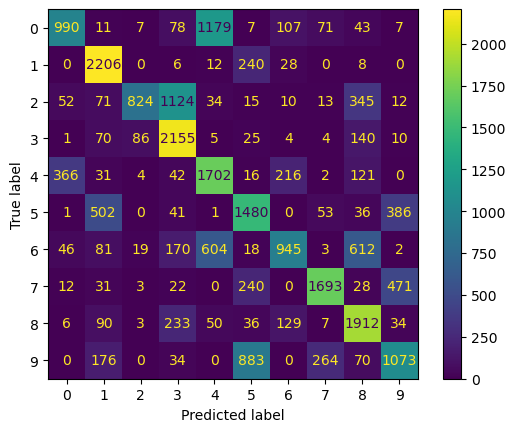

In [58]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.savefig("confusion_matrix_gnb.png", dpi = 200)

In [17]:
gnb_grid = {"estimator__var_smoothing" : [.05, .1, .3, .5, 1]}


In [18]:
gnb = GaussianNB()

accs, baccs, fit_times, test_times = nested_cv(gnb,gnb_grid, X_train, y_train)
results = add_results(results=results, name = "gnb", accs = accs, baccs = baccs, fit_times = fit_times, test_times= test_times)

clf_gnb = train_prod_model(X_train, y_train, gnb, gnb_grid)

print(clf_gnb.best_params_)

accuracy_score(y_test, clf_gnb.predict(X_test))


Running Outer CV in iteration  0  at time  0.0
Running Outer CV in iteration  1  at time  17.33938241004944
Running Outer CV in iteration  2  at time  32.818068742752075
Total time :  47.43479371070862  sec
{'estimator__var_smoothing': 0.1}


0.5992

In [19]:
gnb_sm = GaussianNB()

accs, baccs, fit_times, test_times = nested_cv(gnb_sm,gnb_grid, X_train_smaller, y_train)
results = add_results(results=results, name = "gnb_sm", accs = accs, baccs = baccs, fit_times = fit_times, test_times= test_times)

clf_gnb_sm = train_prod_model(X_train_smaller, y_train, gnb_sm, gnb_grid)

print(clf_gnb_sm.best_params_)


accuracy_score(y_test, clf_gnb_sm.predict(X_test_smaller))


Running Outer CV in iteration  0  at time  0.0
Running Outer CV in iteration  1  at time  7.608155250549316
Running Outer CV in iteration  2  at time  15.331892490386963
Total time :  23.02788805961609  sec
{'estimator__var_smoothing': 0.05}


0.5992

In [20]:
results

,name,accs_mean,accs_std,accs_min,accs_max,baccs_mean,baccs_std,baccs_min,baccs_max,fit_time,test_time
0,gnb,0.601413,0.001692,0.598872,0.603864,0.601416,0.001672,0.598913,0.603820,12.691428,0.492448
1,gnb_sm,0.601453,0.003275,0.595392,0.607824,0.601455,0.003260,0.595448,0.607838,7.204690,0.171305


#### Support Vector Classifier

0.73376

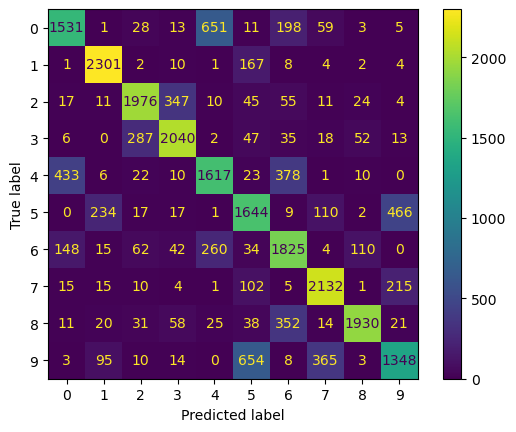

In [54]:
clf = SVC(random_state=0, C = 1, kernel="rbf")
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.savefig("confusion_matrix_svc.png", dpi = 200)
accuracy_score(y_test, predictions)

In [22]:
svc_grid = {"estimator__kernel" : ['linear','rbf'], "estimator__C": [0.1, 1]}

In [23]:
svc = SVC()

accs, baccs, fit_times, test_times = nested_cv(svc,svc_grid, X_train, y_train)
results = add_results(results=results, name = "svc", accs = accs, baccs = baccs, fit_times = fit_times, test_times= test_times)

clf = train_prod_model(X_train, y_train, svc, svc_grid)

print(clf.best_params_)

Running Outer CV in iteration  0  at time  0.0
Running Outer CV in iteration  1  at time  1295.9148576259613
Running Outer CV in iteration  2  at time  2588.128350496292
Total time :  4328.871222019196  sec
{'estimator__C': 1, 'estimator__kernel': 'rbf'}


In [24]:
accuracy_score(y_test, clf.predict(X_test))

0.73376

In [25]:
svc = SVC()

accs, baccs, fit_times, test_times = nested_cv(svc,svc_grid, X_train_smaller, y_train)
results = add_results(results=results, name = "svc_sm", accs = accs, baccs = baccs, fit_times = fit_times, test_times= test_times)

clf_svc_sm = train_prod_model(X_train_smaller, y_train, svc, svc_grid)

print(clf_svc_sm.best_params_)
accuracy_score(y_test, clf_svc_sm.predict(X_test_smaller))

Running Outer CV in iteration  0  at time  0.0
Running Outer CV in iteration  1  at time  829.8190886974335
Running Outer CV in iteration  2  at time  1654.8407943248749
Total time :  2652.6554703712463  sec
{'estimator__C': 1, 'estimator__kernel': 'rbf'}


0.728

#### Random Forest Classifier

In [26]:
random_forest_grid = {"estimator__n_estimators" : [10, 100, 150, 300]}

fitted


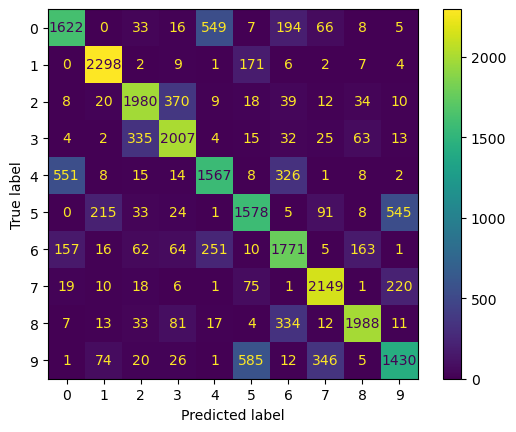

In [50]:
clf = RandomForestClassifier(random_state=1, n_estimators=300)
clf.fit(X_train, y_train)
print("fitted")

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()


0.7356

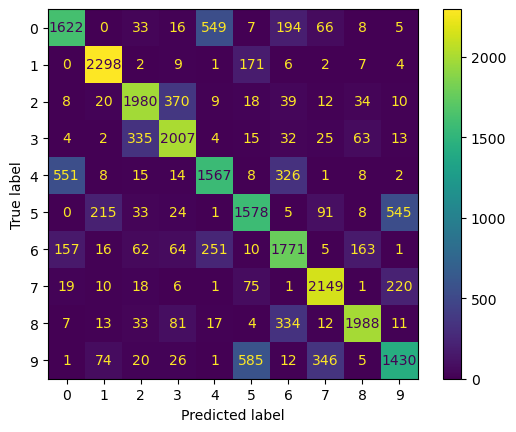

In [53]:
disp.plot()
plt.savefig("confusion_matrix_rf.png", dpi = 200)
accuracy_score(y_test, predictions)

In [29]:
rfc = RandomForestClassifier(random_state=1)

accs, baccs, fit_times, test_times = nested_cv(rfc,random_forest_grid, X_train_smaller, y_train)
results = add_results(results=results, name = "random_forest_sm", accs = accs, baccs = baccs, fit_times = fit_times, test_times= test_times)

clf_rfc_sm = train_prod_model(X_train_smaller, y_train, rfc, random_forest_grid)

print(clf_rfc_sm.best_params_)
accuracy_score(y_test, clf_rfc_sm.predict(X_test_smaller))

Running Outer CV in iteration  0  at time  0.0


Running Outer CV in iteration  1  at time  724.240739107132
Running Outer CV in iteration  2  at time  1446.7431104183197
Total time :  2172.8570795059204  sec
{'estimator__n_estimators': 300}


0.73528

In [30]:
# Random Forest Complete DataSet
rfc = RandomForestClassifier(random_state=1)

accs, baccs, fit_times, test_times = nested_cv(rfc,random_forest_grid, X_train, y_train)
results = add_results(results=results, name = "random_forest", accs = accs, baccs = baccs, fit_times = fit_times, test_times= test_times)

clf_rfc = train_prod_model(X_train, y_train, rfc, random_forest_grid)

print(clf_rfc.best_params_)
accuracy_score(y_test, clf_rfc.predict(X_test))

Running Outer CV in iteration  0  at time  0.0
Running Outer CV in iteration  1  at time  989.4422256946564
Running Outer CV in iteration  2  at time  1983.4210386276245
Total time :  2970.4815986156464  sec
{'estimator__n_estimators': 300}


0.7356

#### kNN-Classifier

In [31]:
# clf = KNeighborsClassifier(n_neighbors = 50)
# clf.fit(X_train, y_train)

# predictions = clf.predict(X_test.values)
# cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                                display_labels=clf.classes_)
# disp.plot();
# accuracy_score(y_test, predictions)

In [32]:
knn = KNeighborsClassifier()
accs, baccs, fit_times, test_times = nested_cv(knn,knn_grid, X_train.values, y_train)
results = add_results(results=results, name = "kNN", accs = accs, baccs = baccs, fit_times = fit_times, test_times= test_times)

clf_knn = train_prod_model(X_train.values, y_train, knn, knn_grid)

print(clf_knn.best_params_)
accuracy_score(y_test, clf_knn.predict(X_test))

Running Outer CV in iteration  0  at time  0.0
Running Outer CV in iteration  1  at time  37.97886395454407
Running Outer CV in iteration  2  at time  75.14391660690308
Total time :  112.42082834243774  sec
{'estimator__n_neighbors': 1, 'estimator__weights': 'uniform'}


0.63788

In [33]:
knn_sm = KNeighborsClassifier()
accs, baccs, fit_times, test_times = nested_cv(knn_sm,knn_grid, X_train_smaller, y_train)
results = add_results(results=results, name = "kNN_sm", accs = accs, baccs = baccs, fit_times = fit_times, test_times= test_times)

clf_knn_sm = train_prod_model(X_train_smaller, y_train, knn_sm, knn_grid)

print(clf_knn_sm.best_params_)
accuracy_score(y_test, clf_knn_sm.predict(X_test_smaller))

Running Outer CV in iteration  0  at time  0.0
Running Outer CV in iteration  1  at time  23.24470853805542
Running Outer CV in iteration  2  at time  47.044713497161865
Total time :  70.57976770401001  sec
{'estimator__n_neighbors': 1, 'estimator__weights': 'uniform'}


0.63104

In [34]:
results

,name,accs_mean,accs_std,accs_min,accs_max,baccs_mean,baccs_std,baccs_min,baccs_max,fit_time,test_time
0,gnb,0.601413,0.001692,0.598872,0.603864,0.601416,0.001672,0.598913,0.603820,12.691428,0.492448
1,gnb_sm,0.601453,0.003275,0.595392,0.607824,0.601455,0.003260,0.595448,0.607838,7.204690,0.171305
2,svc,0.726213,0.002954,0.721502,0.730589,0.726213,0.002954,0.721526,0.730592,1399.935758,38.678565
3,svc_sm,0.720613,0.002929,0.715829,0.724829,0.720613,0.002929,0.715801,0.724825,844.496470,31.539375
4,random_forest_sm,0.729293,0.004982,0.723149,0.738390,0.729293,0.004982,0.723127,0.738368,719.034351,0.530636
5,random_forest,0.731787,0.004070,0.725342,0.739710,0.731786,0.004061,0.725361,0.739691,987.509642,0.546636
6,kNN,0.628587,0.004327,0.620905,0.634825,0.628587,0.004320,0.620896,0.634818,32.327905,3.219947
7,kNN_sm,0.623613,0.004456,0.614545,0.629905,0.623613,0.004460,0.614535,0.629897,20.451361,1.933932


#### Decision Tree

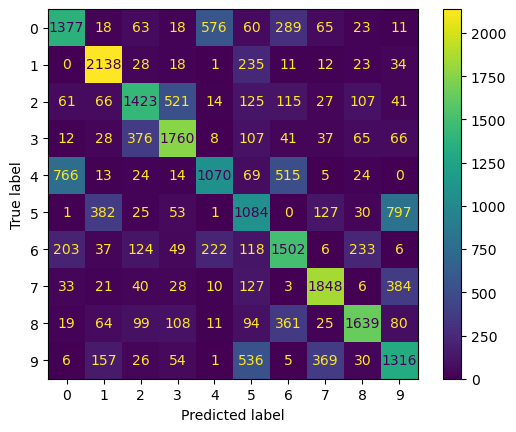

In [59]:
clf = DecisionTreeClassifier(random_state= 1, max_depth = 8, criterion="entropy")
clf.fit(X_train, y_train)

predictions = clf.predict(X_test.values)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot();
plt.savefig("confusion_matrix_decision_tree.png", dpi = 200)

In [35]:
# clf = DecisionTreeClassifier(random_state= 1, max_depth = 10, criterion="gini")
# clf.fit(X_train, y_train)

# predictions = clf.predict(X_test.values)
# plot_results(y_test, predictions, clf)

# Random Forest Complete DataSet


tree = DecisionTreeClassifier(random_state=1)

accs, baccs, fit_times, test_times = nested_cv(tree,tree_grid, X_train, y_train)
results = add_results(results=results, name = "decision_tree", accs = accs, baccs = baccs, fit_times = fit_times, test_times= test_times)

clf_tree = train_prod_model(X_train, y_train, tree, tree_grid)

print(clf_tree.best_params_)
accuracy_score(y_test, clf_tree.predict(X_test))

Running Outer CV in iteration  0  at time  0.0
Running Outer CV in iteration  1  at time  464.8801691532135
Running Outer CV in iteration  2  at time  929.7881329059601
Total time :  1394.8440556526184  sec
{'estimator__criterion': 'entropy', 'estimator__max_depth': 8}


0.60628

In [36]:
tree = DecisionTreeClassifier(random_state=1)

accs, baccs, fit_times, test_times = nested_cv(tree,tree_grid, X_train_smaller, y_train)
results = add_results(results=results, name = "decision_tree_sm", accs = accs, baccs = baccs, fit_times = fit_times, test_times= test_times)

clf_tree_sm = train_prod_model(X_train_smaller, y_train, tree, tree_grid)

print(clf_tree_sm.best_params_)
accuracy_score(y_test, clf_tree_sm.predict(X_test_smaller))

Running Outer CV in iteration  0  at time  0.0
Running Outer CV in iteration  1  at time  231.35378193855286
Running Outer CV in iteration  2  at time  462.4271800518036
Total time :  693.0663592815399  sec
{'estimator__criterion': 'entropy', 'estimator__max_depth': 8}


0.60864

## Test

In [41]:
max_x_train = np.array([np.argmax(X_train.iloc[i]) for i in range(len(X_train))]).reshape(-1,1)
max_x_test = np.array([np.argmax(X_test.iloc[i]) for i in range(len(X_test))]).reshape(-1,1)

In [43]:
knn = KNeighborsClassifier()
knn_argmax_grid = {"estimator__n_neighbors" : [500]} #[100, 500, 1000, 5000]}



accs, baccs, fit_times, test_times = nested_cv(knn,knn_argmax_grid, max_x_train, y_train)
results = add_results(results=results, name = "kNN_argmax", accs = accs, baccs = baccs, fit_times = fit_times, test_times= test_times)

clf_knn_sm = train_prod_model(max_x_train, y_train, knn, knn_argmax_grid)

print(clf_knn_sm.best_params_)

y_pred = clf_knn_sm.predict(max_x_test)
accuracy_score(y_test, y_pred)


Running Outer CV in iteration  0  at time  0.0
Running Outer CV in iteration  1  at time  8.054792404174805
Running Outer CV in iteration  2  at time  16.103919744491577
Total time :  24.894843339920044  sec
{'estimator__n_neighbors': 500}


0.4394

0.4394

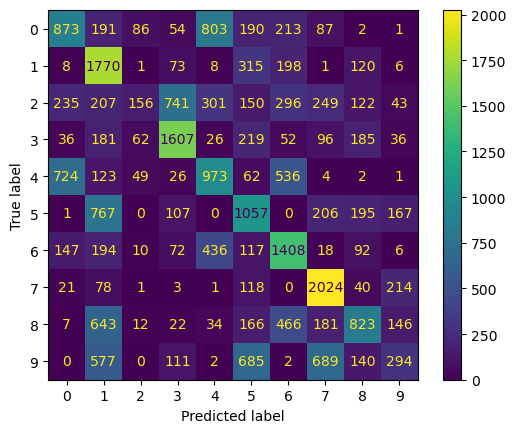

In [48]:
cm = confusion_matrix(y_test, clf_knn_sm.predict(max_x_test), labels=clf_knn_sm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_knn_sm.classes_)
disp.plot()
plt.savefig("confusion_matrix_knn_argmax.png")

accuracy_score(y_test, clf_knn_sm.predict(max_x_test))

In [ ]:
disp

In [1]:
results.sort_values("baccs_mean")

NameError: name 'results' is not defined

In [41]:
results.round(6).to_csv("results.csv")

In [42]:
df_train

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att592,att593,att594,att595,att596,att597,att598,att599,att600,target
0,0.000153,-6.578439e-05,0.000038,-0.000029,0.000020,-0.000006,0.000004,0.000002,0.000003,-0.000003,...,-0.000003,0.000010,-0.000006,-0.000006,-0.000010,0.000011,-4.337056e-07,0.000013,-0.000024,b'Aedes_female'
1,-0.000029,6.673935e-07,0.000035,-0.000119,-0.000141,-0.000131,-0.000251,-0.000253,-0.000261,-0.000309,...,0.001548,0.001509,0.001564,0.001499,0.001487,0.001473,1.498447e-03,0.001388,0.001597,b'Aedes_female'
2,-0.019499,4.194278e-02,0.192660,0.232282,0.132188,0.013040,-0.035715,-0.066381,-0.070153,-0.050134,...,0.087443,0.234516,0.242373,0.130852,0.042257,-0.005834,-7.398573e-02,-0.047510,-0.037126,b'Aedes_female'
3,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,b'Aedes_female'
4,0.000023,-7.772223e-05,0.000111,-0.000096,0.000043,0.000023,-0.000083,0.000119,-0.000104,0.000058,...,-0.000201,-0.000108,-0.000037,0.000045,0.000112,0.000165,2.464727e-04,0.000267,0.000361,b'Aedes_female'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-0.038172,-6.510722e-02,-0.050728,-0.057015,-0.059738,-0.062525,-0.041550,-0.029602,-0.071081,-0.085259,...,0.015370,0.011291,0.007858,0.000036,-0.009820,-0.016796,-2.788711e-02,-0.035114,-0.043915,b'Tarsalis_male'
24996,-0.004521,-5.507769e-03,-0.003324,-0.002715,-0.001349,-0.000586,0.000324,0.000365,0.000511,0.000505,...,-0.002677,-0.002820,-0.002841,-0.002871,-0.002874,-0.002720,-2.747607e-03,-0.002502,-0.002782,b'Tarsalis_male'
24997,0.000001,1.723497e-05,0.000005,-0.000009,-0.000001,-0.000002,-0.000010,0.000010,-0.000008,0.000007,...,-0.007817,-0.007665,-0.007593,-0.007307,-0.007141,-0.006762,-6.597169e-03,-0.005984,-0.006218,b'Tarsalis_male'
24998,-0.000047,-5.119860e-05,-0.000045,-0.000071,-0.000065,-0.000030,-0.000031,-0.000056,-0.000067,-0.000051,...,-0.130079,-0.118307,-0.106510,-0.110060,-0.106163,-0.085816,-6.483196e-02,-0.050146,-0.114638,b'Tarsalis_male'


In [43]:
from sktime.classification.ensemble import BaggingClassifier
from sktime.classification.kernel_based import RocketClassifier
from sktime.datasets import load_unit_test

clf = BaggingClassifier(
    RocketClassifier(num_kernels=100),
    n_estimators=10,
) 

clf.fit(df_train.drop(columns = "target"), df_train.target) 
y_pred = clf.predict(df_test.drop(columns = "target")) 

TypeError: X must be in an sktime compatible format. Allowed scitypes for classifiers are Panel mtypes, for instance a pandas.DataFrame with MultiIndex and last(-1) level an sktime compatible time index. Allowed compatible mtype format specifications are: ['nested_univ', 'numpy3D', 'numpyflat', 'pd-multiindex', 'pd-wide', 'pd-long', 'df-list', 'dask_panel'] . See the data format tutorial examples/AA_datatypes_and_datasets.ipynb. If you think the data is already in an sktime supported input format, run sktime.datatypes.check_raise(data, mtype) to diagnose the error, where mtype is the string of the type specification you want. Error message for checked mtypes, in format [mtype: message], as follows: [df-list: obj must be list of pd.DataFrame, found <class 'pandas.core.frame.DataFrame'>]  [numpy3D: obj must be a numpy.ndarray, found <class 'pandas.core.frame.DataFrame'>]  [pd-multiindex: obj must have a MultiIndex, found <class 'pandas.core.indexes.range.RangeIndex'>]  [nested_univ: obj All columns must be object, found <class 'pandas.core.frame.DataFrame'>]  [dask_panel: obj must be a dask DataFrame, found <class 'pandas.core.frame.DataFrame'>] 

In [ ]:
import sktime.datatypes
sktime.datatypes.get_examples(mtype="pd-multiindex", as_scitype="Panel")[0]

ModuleNotFoundError: No module named 'sktime.datatypes._convert.convert_to'; 'sktime.datatypes._convert' is not a package

In [ ]:
l = [1,2,3]

import pandas as pd

s = pd.Series(l)

s.value_counts()

1    1
2    1
3    1
dtype: int64

In [2]:
import pandas as pd

In [24]:
df = pd.read_csv("results.csv", index_col="name")
df.drop(columns = "Unnamed: 0", inplace=True)
df.drop(columns=df.columns[df.columns.str.contains("baccs")], inplace=True)
df.rename({"gnb": "Gaussian Naive Bayes","gnb_sm": "Gaussian Naive Bayes small", "svc": "Support Vector Classifier", "svc_sm": "Support Vector Classifier small","random_forest": "Random Forest", "random_forest_sm": "Random Forest small" , "kNN": "k-Nearest-Neighbors", "kNN_sm": "k-Nearest-Neighbors small", "kNN_argmax": "k-Nearest-Neighbors (max frequency)", "decision_tree": "Decision Tree", "decision_tree_sm": "Decision Tree small"}, inplace=True)
df.sort_values("accs_mean").to_csv("results_clean.csv")
df.sort_values("accs_mean")

,accs_mean,accs_std,accs_min,accs_max,fit_time,test_time
name,,,,,,
k-Nearest-Neighbors (max frequency),0.435120,0.003670,0.430577,0.443178,57.485401,0.876546
Decision Tree,0.596813,0.008794,0.586153,0.610944,463.918601,0.010120
Decision Tree small,0.599493,0.006254,0.586753,0.607871,229.329387,0.008096
Gaussian Naive Bayes,0.601413,0.001692,0.598872,0.603864,12.691428,0.492448
Gaussian Naive Bayes small,0.601453,0.003275,0.595392,0.607824,7.204690,0.171305
k-Nearest-Neighbors small,0.623613,0.004456,0.614545,0.629905,20.451361,1.933932
k-Nearest-Neighbors,0.628587,0.004327,0.620905,0.634825,32.327905,3.219947
Support Vector Classifier small,0.720613,0.002929,0.715829,0.724829,844.496470,31.539375
Support Vector Classifier,0.726213,0.002954,0.721502,0.730589,1399.935758,38.678565
